In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np
import re

sns.set_theme()

In [13]:
def get_metrics(
        logs_to_evaluate,
        hist_stats_names=("policy_main_reward", "win_rate", "final_score_0", "final_score_1", "undesirable_action_0")
):
    for stage in logs_to_evaluate:
        logs_paths = stage["log_paths"]
        stage["data"] = {}
        stage["table"] = {}
        for log_path in logs_paths:
            with open(os.path.join(log_path, "experiment_config.json")) as f:
                stage["table"][log_path] = json.load(f)

            files = [os.path.join(log_path, f) for f in os.listdir(log_path) if os.path.isfile(os.path.join(log_path, f)) and f.startswith('result_iteration_')]
            files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

            hist_stats = defaultdict(list)
            for file in files:
                with open(file) as f:
                    d = json.load(f)
                    for hist_stat in hist_stats_names:
                        if hist_stat not in d["env_runners"]["hist_stats"]:
                            continue
                        hist_stats[hist_stat].append(np.array(d["env_runners"]["hist_stats"][hist_stat]))
                        hist_stats[hist_stat+"_mean"].append(np.mean(hist_stats[hist_stat][-1]))
                        hist_stats[hist_stat+"_min"].append(np.mean(hist_stats[hist_stat][-1]))
                        hist_stats[hist_stat+"_max"].append(np.mean(hist_stats[hist_stat][-1]))

            stage["data"][log_path] = hist_stats

In [50]:
# Add all paths to the experiments here

# Henry Grid Search
logs_to_evaluate = [
    {
        "title": "Different Action Reward Reductions and Decays",
        "log_paths": {
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.95_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.95",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.98",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.995_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.995",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.95_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.95",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.98",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.995_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.995",
        }
    },
    {
        "title": "Efficient One Hot vs. simple encoding and different NN sizes",
        "log_paths": {
            "logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[16]_against_other": "EOH, [16]",
            "logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "EOH, [32]",
            "logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64]_against_other": "EOH, [64]",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[16]_against_other": "Simple, [16]",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "Simple, [32]",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64]_against_other": "Simple, [64]",
        }
    },
    {
        "title": "Efficient One Hot vs. simple encoding and different NN sizes",
        "log_paths": {
            "logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other": "EOH, [32, 32]",
            "logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other": "EOH, [64, 64]",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other": "Simple, [32, 32]",
            "logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other": "Simple, [64, 64]",
        }
    }
]

# Flo Grid Search
# logs_to_evaluate = [
#     {
#         "title": "Different Action Reward Reductions and Decays",
#         "log_paths": {
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.95_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.95",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.98",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.995_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.995",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.95_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.95",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.98",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.995_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.995",
#         }
#     },
#     {
#         "title": "Efficient One Hot vs. simple encoding and different NN sizes",
#         "log_paths": {
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[16]_against_other": "EOH, [16]",
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "EOH, [32]",
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64]_against_other": "EOH, [64]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[16]_against_other": "Simple, [16]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "Simple, [32]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64]_against_other": "Simple, [64]",
#         }
#     },
#     {
#         "title": "Efficient One Hot vs. simple encoding and different NN sizes",
#         "log_paths": {
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other": "EOH, [32, 32]",
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other": "EOH, [64, 64]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other": "Simple, [32, 32]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other": "Simple, [64, 64]",
#         }
#     }
# ]

# All logs
# logs_to_evaluate = [
#     {
#         "title": "Different Action Reward Reductions and Decays",
#         "log_paths": {
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.95_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.95",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.98",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.995_ent_0.01_nn_[32]_against_other": "AR=5, Decay=0.995",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.95_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.95",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.98",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.995_ent_0.01_nn_[32]_against_other": "AR=1, Decay=0.995",
#         }
#     },
#     {
#         "title": "Efficient One Hot vs. simple encoding and different NN sizes",
#         "log_paths": {
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[16]_against_other": "EOH, [16]",
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "EOH, [32]",
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64]_against_other": "EOH, [64]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[16]_against_other": "Simple, [16]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other": "Simple, [32]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64]_against_other": "Simple, [64]",
#         }
#     },
#     {
#         "title": "Efficient One Hot vs. simple encoding and different NN sizes",
#         "log_paths": {
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other": "EOH, [32, 32]",
#             "logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other": "EOH, [64, 64]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other": "Simple, [32, 32]",
#             "logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other": "Simple, [64, 64]",
#         }
#     }
# ]

# Henry all other models
# logs_to_evaluate = [
#     {
#         "title": "Large-sized Models",
#         "log_paths": {
#             'logs/grid_search/obs_onehot_indirect_False_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "OH, direct, [8192, 2048, 512]",
#             'logs/grid_search/obs_onehot_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "OH, indirect, [8192, 2048, 512]",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "Simple, direct, [8192, 2048, 512]",
#             # 'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[8192, 2048, 512]': "Simple, indirect",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "Simple, indirect, [8192, 2048, 512]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[4096, 2048, 512]': "Simple, indirect, [4096, 2048, 512]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 4096, 2048, 512]': "Simple, indirect, [2048, 4096, 2048, 512]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 3072, 2048, 512]': "Simple, indirect, [2048, 3072, 2048, 512]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 2048, 2048, 2048, 512]': "Simple, indirect, [2048, 2048, 2048, 2048, 512]",
#             # 'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 2048, 1024, 512, 256]': "Simple, indirect, [2048, 2048, 1024, 512, 256]",
#         }
#     },
#     {
#         "title": "Medium-sized Models",
#         "log_paths": {
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[512, 256]': "Entropy=0.01, [512, 256]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[512, 256]': "Entropy=0.03, [512, 256]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.005_nn_[256]': "Entropy=0.005, [256]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[256]': "Entropy=0.01, [256]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[256]': "Entropy=0.03, [256]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.005_nn_[128, 64]': "Entropy=0.005, [128, 64]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[128, 64]': "Entropy=0.01, [128, 64]",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[128, 64]': "Entropy=0.03, [128, 64]",
#             # 'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.005_nn_[128]': "Entropy=0.005, [128]",
#             # 'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[128]': "Entropy=0.01, [128]",
#             # 'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[128]': "Entropy=0.03, [128]",
#             # 'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[64]': "Entropy=0.01, [64]",
#         }
#     },
# ]

# All logs agains PPP
# logs_to_evaluate = [
#     {
#         "title": "",
#         "log_paths": {
#             'logs/grid_search_flo/obs_onehot_indirect_False_vf_True_cr_5.0_ar_5_decay_0.98_ent_0.03_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_onehot_indirect_True_vf_True_cr_5.0_ar_5_decay_0.98_ent_0.03_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[0]': "",
#             'logs/grid_search_flo/obs_simple_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_0_af_relu': "",
#             'logs/grid_search_flo/obs_simple_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[2048, 2048, 1024, 512]_af_tanh': "",
#             'logs/grid_search_flo/obs_simple_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[256, 256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[256, 256]_af_relu': "",
#             'logs/grid_search_flo/obs_simple_indirect_False_vf_True_cr_5.0_ar_5_decay_0.98_ent_0.03_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0.0_ar_1_decay_1_ent_0.03_nn_[64]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0.0_ar_5_decay_0.98_ent_0.01_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_0.5_ent_0.03_nn_[16]_del2': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[128]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[128, 32]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[128, 64]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[128, 64, 128]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[128, 64, 32]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[16]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[16, 16]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[16, 8]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[256, 256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[32]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[32, 16]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[32, 32]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[64]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[64, 128, 256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[64, 32]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[8]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_1_ent_0.03_nn_[8, 8]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.98_ent_0.01_nn_[16]_test': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_lr_0.0001_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_5_decay_0.98_ent_0.01_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_5_decay_0.98_ent_0.03_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_5_decay_1_ent_0.01_nn_[1024, 1024, 512, 256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_5_decay_1_ent_0.01_nn_[1024, 512, 256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5.0_ar_5_decay_1_ent_0.01_nn_[512, 256, 128]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_0.95_ent_0.01_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_0.98_ent_0.03_nn_[256, 256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_0.98_ent_0.03_nn_[32]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_0.995_ent_0.01_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_1_ent_0.01_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_1_ent_0.03_nn_[128]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_1_ent_0.03_nn_[16]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_1_ent_0.03_nn_[256]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_1_ent_0.03_nn_[32]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_1_ent_0.03_nn_[64]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_1_decay_1_ent_0.03_nn_[8]': "",
#             'logs/grid_search_flo/obs_simple_indirect_True_vf_True_cr_5_ar_5_decay_0.98_ent_0.01_nn_[2048, 2048, 1024, 512]': "",
#             'logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[16]_against_other': "",
#             'logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other': "",
#             'logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other': "",
#             'logs/grid_search/obs_efficient_one_hot_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64]_against_other': "",
#             'logs/grid_search/obs_onehot_indirect_False_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "",
#             'logs/grid_search/obs_onehot_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_0_fixed_decay_0_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.95_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[16]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[64]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.995_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.95_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.995_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search/obs_simple_indirect_False_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_0_ar_1_decay_0.5_ent_0.03_nn_[16]_del2': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.005_nn_[128]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.005_nn_[128, 64]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.005_nn_[256]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[128]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[128, 64]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 2048, 1024, 512, 256]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 2048, 2048, 2048, 512]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 3072, 2048, 512]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[2048, 4096, 2048, 512]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[256]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[4096, 2048, 512]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[512, 256]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[64]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.01_nn_[8192, 2048, 512]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[128]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[128, 64]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[256]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[512, 256]': "",
#             'logs/grid_search/obs_simple_indirect_True_vf_True_cr_5.0_ar_1_decay_0.995_ent_0.03_nn_[8192, 2048, 512]': "",
#         }
#     }
# ]

# All logs against OP
# logs_to_evaluate = [
#     {
#         "title": "",
#         "log_paths": {
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.01_nn_[64]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[16]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_2_ar_1_decay_0.995_ent_0.01_nn_[128, 128]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_2_ar_1_decay_0.995_ent_0.01_nn_[128, 128]_against_other2': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_2_ar_1_decay_0.995_ent_0.01_nn_[16]_against_other2': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_2_ar_1_decay_0.995_ent_0.01_nn_[32, 32]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_2_ar_1_decay_0.995_ent_0.01_nn_[32, 32]_against_other2': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_2_ar_1_decay_0.995_ent_0.01_nn_[64, 64]_against_other': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_2_ar_1_decay_0.995_ent_0.01_nn_[64, 64]_against_other2': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_3_ar_1_decay_0.995_ent_0.01_nn_[64, 64]_against_other_to_zero': "",
#             'logs/grid_search_flo/obs_efficient_one_hot_port_to_other_indirect_False_vf_True_cr_3_ar_1_fixed_decay_0.98_ent_0.01_nn_[16]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0.0_ar_1_decay_1_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.01_nn_[128]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_decay_1_ent_0.01_nn_[64]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.95_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_1_fixed_decay_0.995_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.95_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[16]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32, 32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64, 64]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.98_ent_0.01_nn_[64]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_0_ar_5_fixed_decay_0.995_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_3_ar_1_fixed_decay_0.98_ent_0.01_nn_[16]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_3_ar_1_fixed_decay_0.98_ent_0.01_nn_[32]_against_other': "",
#             'logs/grid_search_flo/obs_simple_port_to_other_indirect_False_vf_True_cr_5_ar_1_decay_1_ent_0.01_nn_[32]_against_other': "",
#         }
#     }
# ]

get_metrics(logs_to_evaluate)
plt.rcParams["figure.figsize"] = (10, 6)

In [51]:
for stage in logs_to_evaluate:
    title, log_paths, data, table = stage["title"], stage["log_paths"], stage["data"], stage["table"]
    print("======================================================")
    print(title)
    print("======================================================\n")
    for log_path in log_paths:
        # find the ten consecutive iterations with the highest win rate
        win_rate = data[log_path]["win_rate_mean"]
        max_win_rate = 0
        max_win_rate_idx = 0
        for idx in range(len(win_rate) - 10):
            if np.mean(win_rate[idx:idx+10]) > max_win_rate:
                max_win_rate = np.mean(win_rate[idx:idx+10])
                max_win_rate_idx = idx
        mean_final_score = np.mean(data[log_path]["final_score_0_mean"][max_win_rate_idx:max_win_rate_idx+10])
        mean_win_rate = np.mean(data[log_path]["win_rate_mean"][max_win_rate_idx:max_win_rate_idx+10])
        undesirable_actions = np.mean(data[log_path]["undesirable_action_0_mean"][max_win_rate_idx:max_win_rate_idx+10])

        table[log_path]["win_rate_mean"] = mean_win_rate
        table[log_path]["mean_final_score"] = mean_final_score
        table[log_path]["undesirable_actions"] = undesirable_actions

        print(f"{log_paths[log_path]} - Final Score: {mean_final_score}")
        print(f"{log_paths[log_path]} - Win Rate: {mean_win_rate}")
        print(f"{log_paths[log_path]} - Undesirable Actions: {undesirable_actions}\n")

Different Action Reward Reductions and Decays

AR=5, Decay=0.95 - Final Score: 20.574
AR=5, Decay=0.95 - Win Rate: 0.53
AR=5, Decay=0.95 - Undesirable Actions: 17.171

AR=5, Decay=0.98 - Final Score: 21.798000000000002
AR=5, Decay=0.98 - Win Rate: 0.5149999999999999
AR=5, Decay=0.98 - Undesirable Actions: 17.266000000000002

AR=5, Decay=0.995 - Final Score: 21.610999999999997
AR=5, Decay=0.995 - Win Rate: 0.485
AR=5, Decay=0.995 - Undesirable Actions: 17.532000000000004

AR=1, Decay=0.95 - Final Score: 20.058999999999997
AR=1, Decay=0.95 - Win Rate: 0.558
AR=1, Decay=0.95 - Undesirable Actions: 17.240000000000002

AR=1, Decay=0.98 - Final Score: 20.403
AR=1, Decay=0.98 - Win Rate: 0.5509999999999999
AR=1, Decay=0.98 - Undesirable Actions: 17.473000000000003

AR=1, Decay=0.995 - Final Score: 21.303999999999995
AR=1, Decay=0.995 - Win Rate: 0.526
AR=1, Decay=0.995 - Undesirable Actions: 17.159

Efficient One Hot vs. simple encoding and different NN sizes

EOH, [16] - Final Score: 21.8690

In [52]:
import pandas as pd

# columns = [
#     "Observation Mode", "Observe Other Player Indirect", "VF Share Layers", "Curiosity Reward",
#     "Action Reward Reduction", "Action Reward Decay", "Entropy Coefficient", "Neural Network Size",
#     "Win Rate Mean", "Mean Final Score", "Undesirable Actions"
# ]

columns = ["Obs. Mode" , "Indirect" , "VF Share" , "CR" , "AR Reduction" , "AR Decay" , "Entropy Coeff." , "NN Size" , "WR" , "FS" , "UA"]

# Create an empty DataFrame
full_data = []

for i, stage in enumerate(logs_to_evaluate):
    table = stage["table"]
    # print("\n==================================")
    # print("Stage", i)
    # print("==================================\n")
    for log_path in table:
        # print(table[log_path])
        full_data.append(table[log_path])
        # full_table.iloc[-1] = table[log_path]

full_table = pd.DataFrame(full_data)
full_table.columns = columns

In [53]:
full_table.sort_values(by="WR", ascending=False, inplace=True)
full_table

,Obs. Mode,Indirect,VF Share,CR,AR Reduction,AR Decay,Entropy Coeff.,NN Size,WR,FS,UA
3,simple,False,True,0,1,0.950,0.01,[32],0.558,20.059,17.240
14,simple,False,True,0,1,0.980,0.01,"[32, 32]",0.558,21.181,17.274
10,simple,False,True,0,1,0.980,0.01,[32],0.551,20.403,17.473
4,simple,False,True,0,1,0.980,0.01,[32],0.551,20.403,17.473
8,efficient_one_hot,False,True,0,1,0.980,0.01,[64],0.541,20.687,17.274
7,efficient_one_hot,False,True,0,1,0.980,0.01,[32],0.540,20.510,17.174
0,simple,False,True,0,5,0.950,0.01,[32],0.530,20.574,17.171
12,efficient_one_hot,False,True,0,1,0.980,0.01,"[32, 32]",0.526,23.172,17.494
5,simple,False,True,0,1,0.995,0.01,[32],0.526,21.304,17.159
13,efficient_one_hot,False,True,0,1,0.980,0.01,"[64, 64]",0.517,23.421,17.897


In [49]:
# full_table.to_csv("logs/tables/all_logs_ppp.csv", index=False)
# full_table.to_latex("logs/tables/all_logs_ppp.tex", index=False, float_format="{:.3g}".format)

In [54]:
def plot_metric(logs_to_evaluate, metric, metric_name):
    for i, stage in enumerate(logs_to_evaluate):
        title, log_paths, data = stage["title"], stage["log_paths"], stage["data"]
        for log_path in log_paths:
            sns.lineplot(data[log_path][metric], alpha=0.2)
        plt.gca().set_prop_cycle(None)
        for log_path in log_paths:
            sns.lineplot(np.convolve(data[log_path][metric], np.ones(10)/10, mode="valid"), label=log_paths[log_path], alpha=1)
        plt.title(f"{title} - {metric_name}")
        # show legend at the bottom below the whole figure
        plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
        # plt.savefig(f"logs/figs/flo_grid_{metric}_{i}.png", dpi=300)
        plt.show()

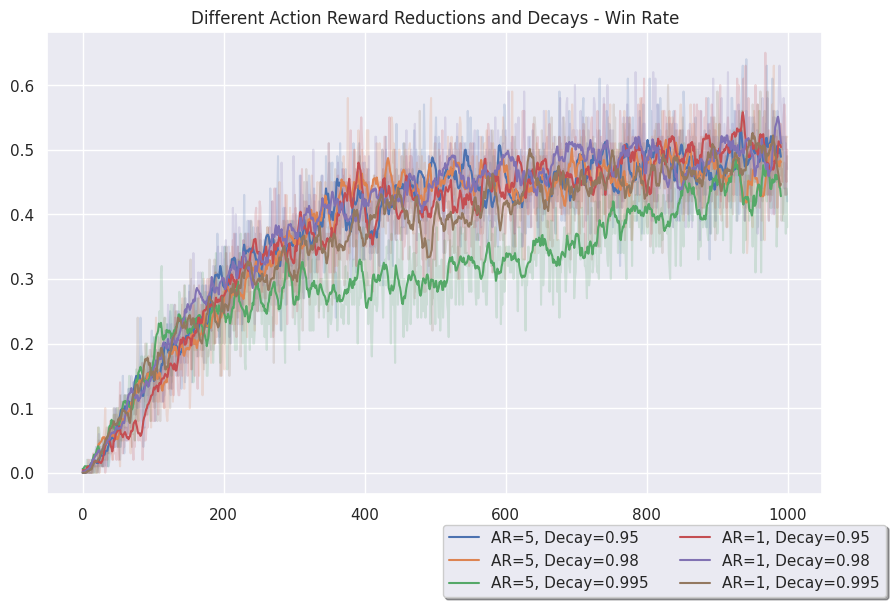

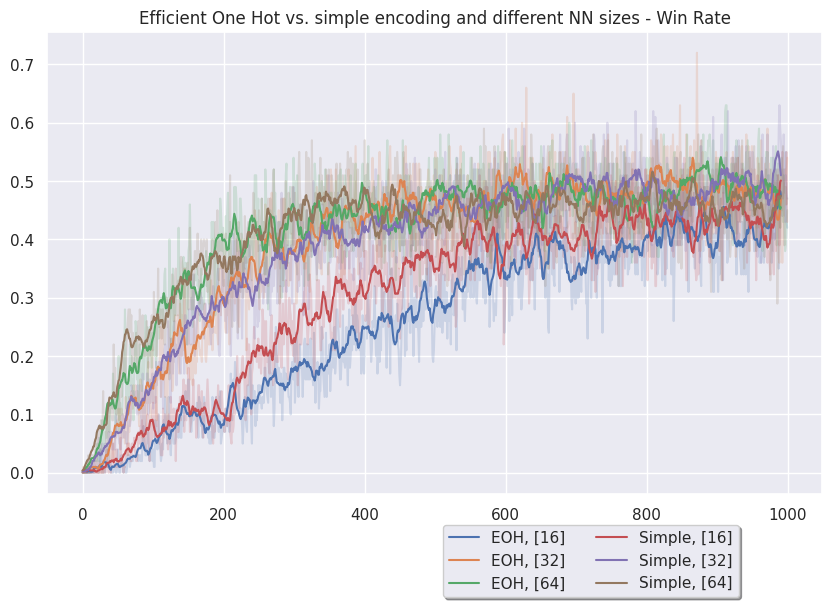

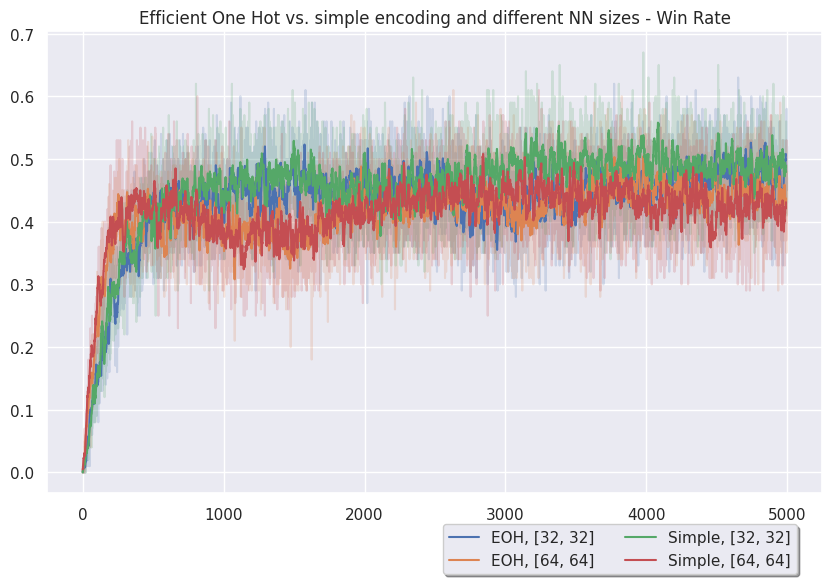

In [55]:
plot_metric(logs_to_evaluate, "win_rate_mean", "Win Rate")

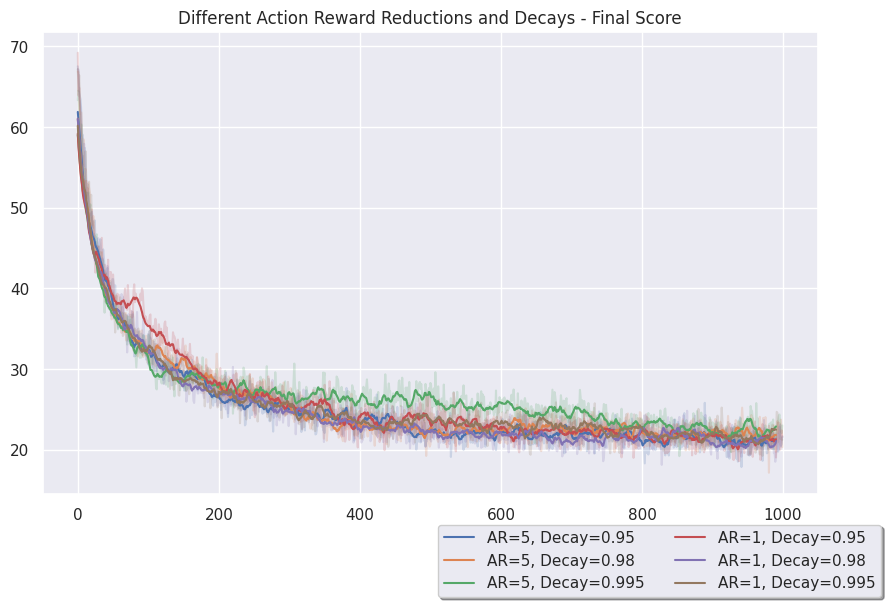

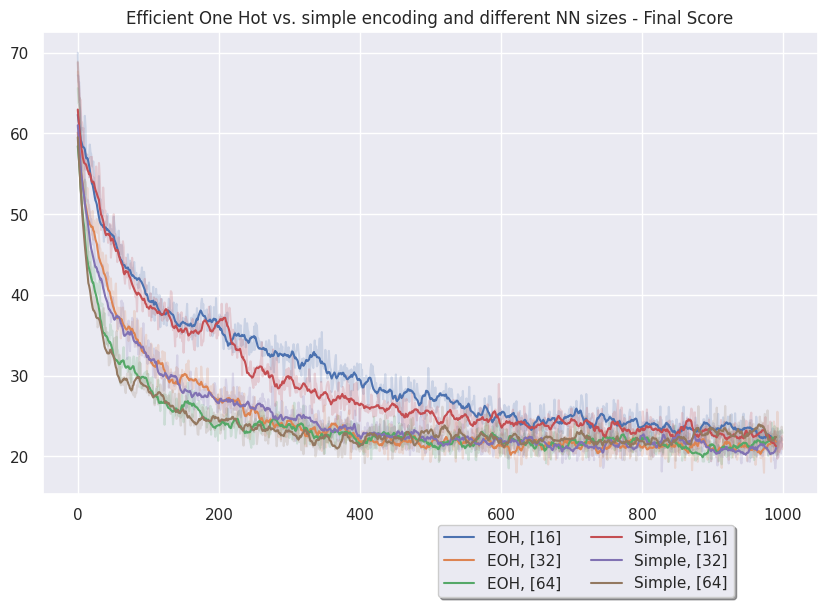

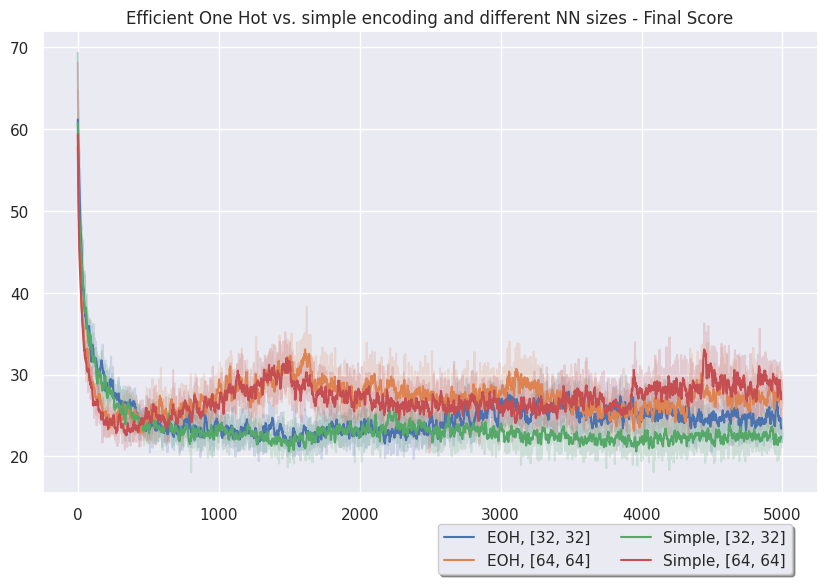

In [56]:
plot_metric(logs_to_evaluate, "final_score_0_mean", "Final Score")

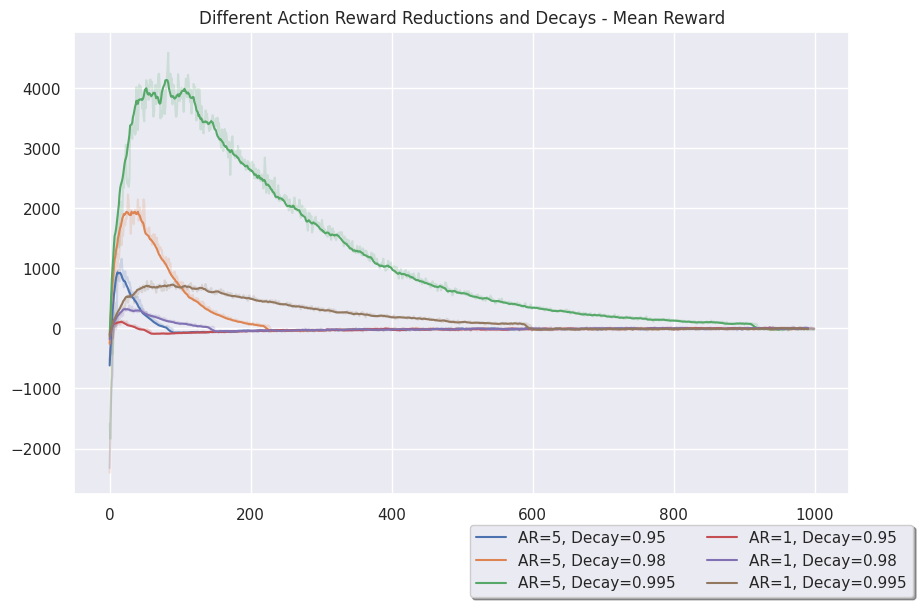

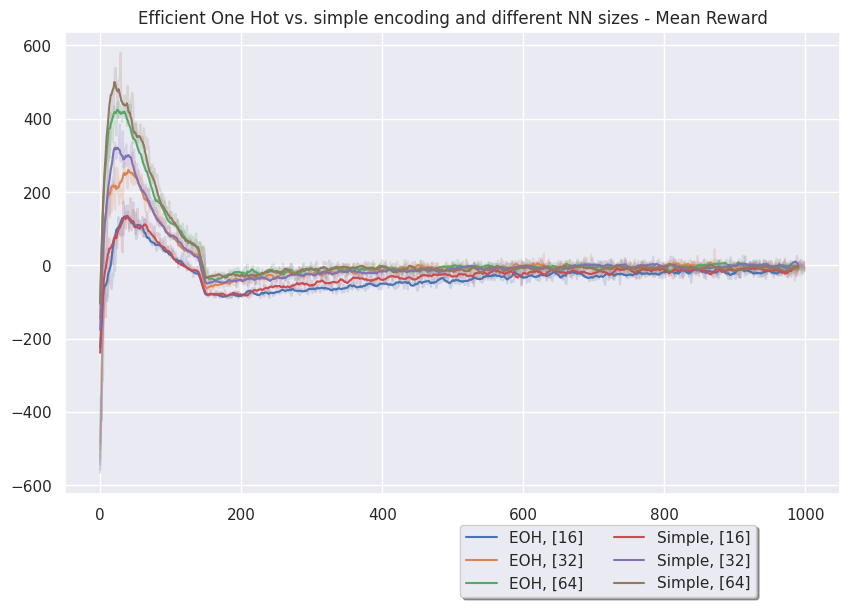

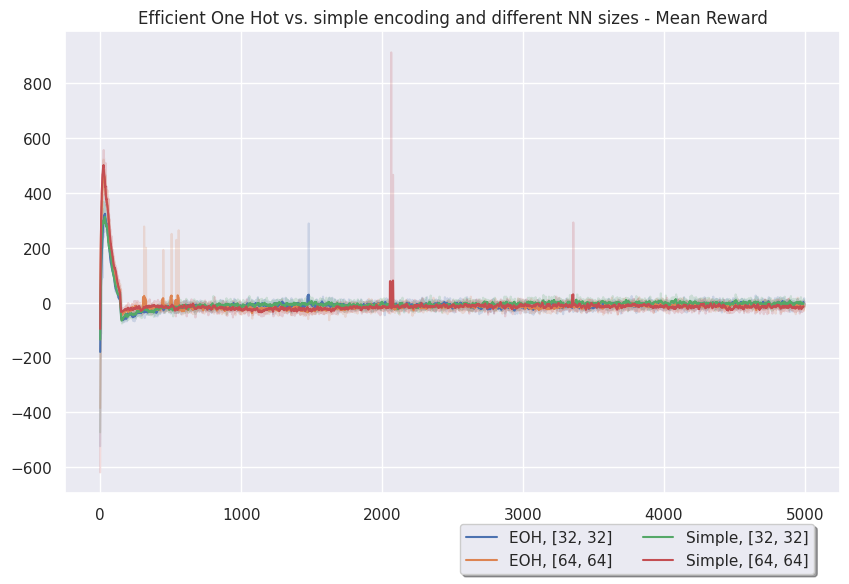

In [57]:
plot_metric(logs_to_evaluate, "policy_main_reward_mean", "Mean Reward")

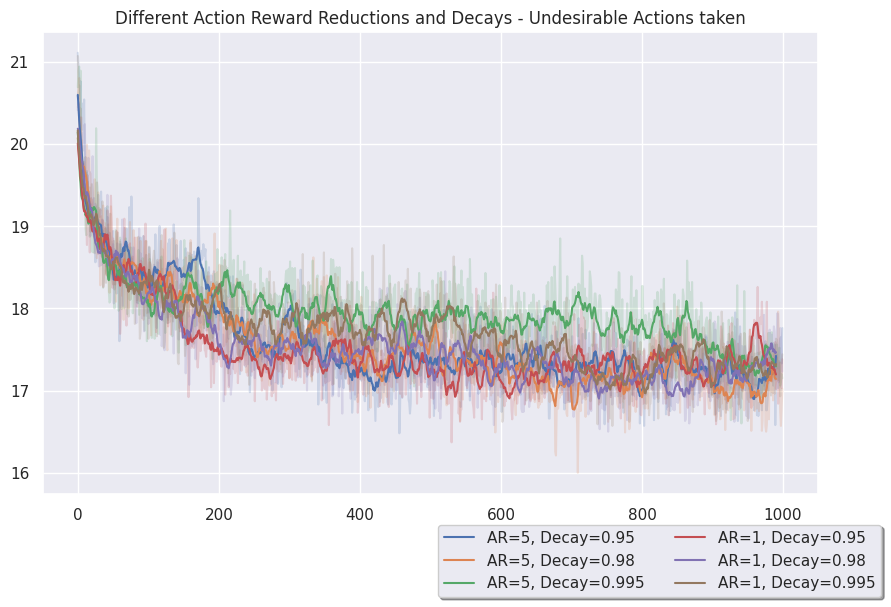

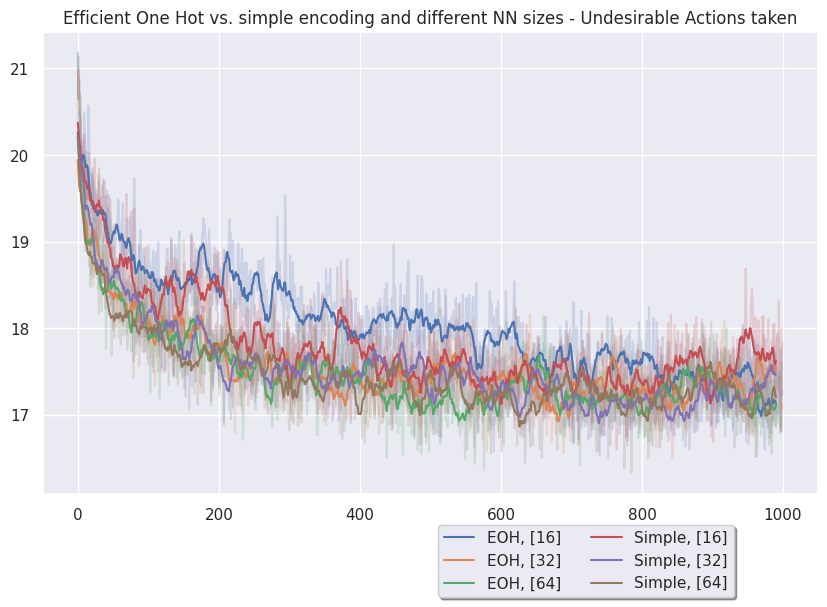

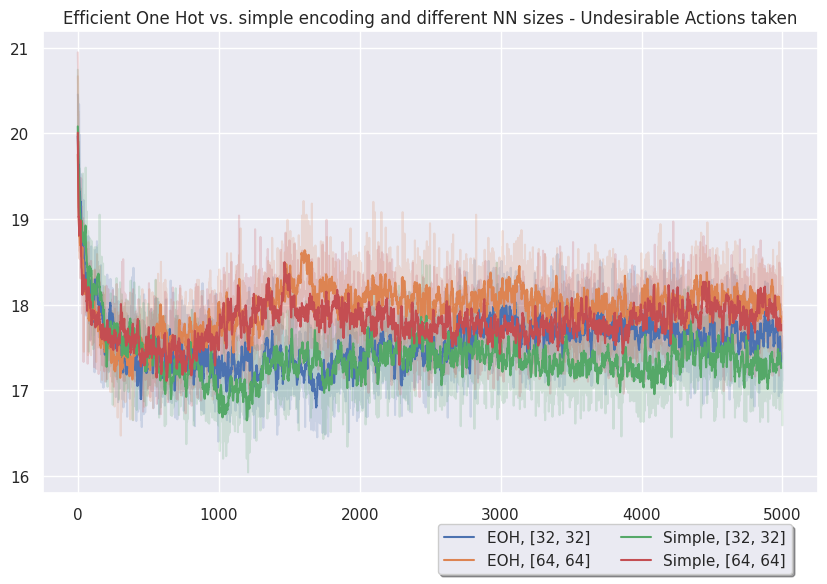

In [58]:
plot_metric(logs_to_evaluate, "undesirable_action_0_mean", "Undesirable Actions taken")